In [17]:
import requests
import pandas as pd
import seaborn as sns

## Exploring a little before diving in

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
response = requests.get(endpoint)
response

<Response [200]>

In [3]:
result = response.json()
result

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [11]:
for entry in result:
    if (entry['query_text'] == 'fire'): #and (entry['year'] == 2016):
        print(entry)

{'month_name': 'February', 'year': '2014', 'query_count': '8', 'query_text': 'fire'}


## 1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [14]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
params = {
    'year':'2016',
    'query_text':'fire'
}
response = requests.get(endpoint, params)
response

<Response [200]>

In [15]:
response.text

'[{"month_name":"January","year":"2016","query_count":"19","query_text":"fire"}\n,{"month_name":"February","year":"2016","query_count":"35","query_text":"fire"}\n,{"month_name":"March","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"April","year":"2016","query_count":"26","query_text":"fire"}\n,{"month_name":"May","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"June","year":"2016","query_count":"31","query_text":"fire"}\n,{"month_name":"July","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"August","year":"2016","query_count":"47","query_text":"fire"}\n,{"month_name":"September","year":"2016","query_count":"36","query_text":"fire"}\n,{"month_name":"October","year":"2016","query_count":"38","query_text":"fire"}\n,{"month_name":"November","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"December","year":"2016","query_count":"38","query_text":"fire"}]\n'

In [16]:
text = response.json()
text

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

### Now to see which month had the most searches

In [24]:
months = []
searches = []

for entry in text:
    months.append(entry['month_name'])
    searches.append(int(entry['query_count']))
#end

In [25]:
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [26]:
searches

[19, 35, 32, 26, 24, 31, 24, 47, 36, 38, 32, 38]

In [27]:
fire_df = pd.DataFrame(months)
fire_df.columns = ['Month']
fire_df['Fire_Searches'] = searches
fire_df

,Month,Fire_Searches
0,January,19
1,February,35
2,March,32
3,April,26
4,May,24
5,June,31
6,July,24
7,August,47
8,September,36
9,October,38


<Axes: xlabel='Fire_Searches', ylabel='Month'>

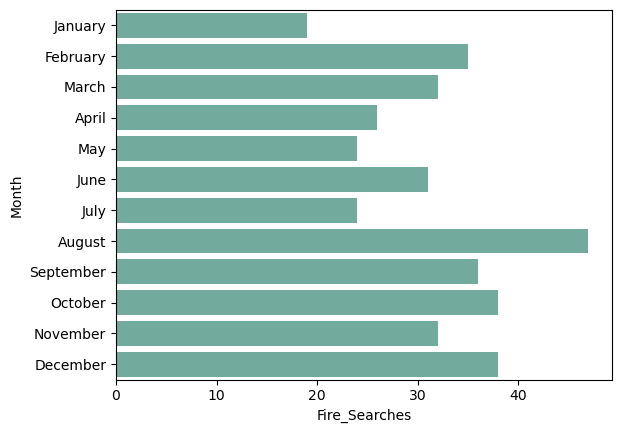

In [31]:
sns.barplot(
    x="Fire_Searches", 
    y="Month", 
    data=fire_df,
    color='#69b3a2')
# Had help from https://python-graph-gallery.com/basic-barplot-with-seaborn/

### Looks like August had the most searches for 'fire'

## 2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [45]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100&$limit=50000'
response = requests.get(endpoint)
response

<Response [200]>

In [46]:
results = response.json()
results

[{'month_name': 'March',
  'year': '2014',
  'query_count': '101',
  'query_text': 'permits'},
 {'month_name': 'January',
  'year': '2015',
  'query_count': '101',
  'query_text': 'criminal court clerk'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'police'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'civil service'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '101',
  'query_text': 'jobs'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'metro holidays'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'longevity pay'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
  'query_text': 'West Nashville Heights Church of Christ'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
 

In [47]:
len(results)

1262

### There are 1262 queries that were searched over 100 times in a month